All of the data was provided by hall health

In [1]:
import random
import numpy
from statistics import mean, stdev
import math 
import matplotlib.pyplot as plt

no_show_rate =  0.2685272

min_rate = 0.12
max_rate = 0.88

iterations = 1000 #simulations
intervals = 250 #days
num_therapists = 4 #averagely there are 4 therapists per hour

No System at all

In [2]:
objective_none = []
resources_wasted_none = [] # by no show
objective_func_none = [-1] #-1 for patients who did not show up

for iteration in range(iterations):
    day = 0
    temp_objective_none = []
    temp_resources_wasted_none = []
    
    while day < intervals:
        no_show_rate = numpy.random.normal(loc=0.2685272, scale=0.09121678, size=1)[0]
        patients_visit = int(numpy.random.normal(62.476, scale=16.72728))
        if no_show_rate < min_rate:
            no_show_rate = min_rate
        if patients_visit < 40:
            patients_visit = 40
        patients_show = int(numpy.random.binomial(patients_visit, 1 - no_show_rate) + 0.5)
        patients_no_show = patients_visit - patients_show
        temp_resources_wasted_none.append(patients_no_show)
        obj_result = objective_func_none[0] * patients_no_show
        temp_objective_none.append(obj_result)
        day = day + 1
    objective_none.append(temp_objective_none)
    resources_wasted_none.append(temp_resources_wasted_none)

In [3]:
avg_objective_none = []
avg_resources_wasted_none = []
for iter in range(iterations):
    avg_objective_none.append(mean(objective_none[iter]))
    avg_resources_wasted_none.append(mean(resources_wasted_none[iter]))

In [4]:
avg_avg_objective_none = mean(avg_objective_none)
avg_avg_objective_none

-16.952616

(array([ 10.,   5.,   7.,  12.,  20.,  40.,  42.,  56.,  75.,  76.,  97.,
        110.,  89., 103.,  79.,  54.,  40.,  36.,  27.,  14.,   4.,   0.,
          1.,   1.,   2.]),
 array([-18.352  , -18.22976, -18.10752, -17.98528, -17.86304, -17.7408 ,
        -17.61856, -17.49632, -17.37408, -17.25184, -17.1296 , -17.00736,
        -16.88512, -16.76288, -16.64064, -16.5184 , -16.39616, -16.27392,
        -16.15168, -16.02944, -15.9072 , -15.78496, -15.66272, -15.54048,
        -15.41824, -15.296  ]),
 <a list of 25 Patch objects>)

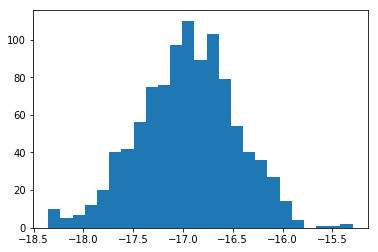

In [6]:
plt.hist(avg_objective_none, bins = 25)

In [7]:
#stress test: when there are patients at maximum capacity
objective_none_max = []
resources_wasted_none_max = [] # by no show
objective_func_none_max = [-1] #-1 for patients who did not show up

for iteration in range(iterations):
    day = 0
    temp_objective_none_max = []
    temp_resources_wasted_none_max = []
    
    while day < intervals:
        no_show_rate = numpy.random.normal(loc=0.2685272, scale=0.09121678, size=1)[0]
        patients_visit = 4 * 9 * 2
        if no_show_rate < min_rate:
            no_show_rate = min_rate
        patients_show = int(numpy.random.binomial(patients_visit, 1 - no_show_rate) + 0.5)
        patients_no_show = patients_visit - patients_show
        temp_resources_wasted_none_max.append(patients_no_show)
        obj_result = objective_func_none[0] * patients_no_show
        temp_objective_none_max.append(obj_result)
        day = day + 1
    objective_none_max.append(temp_objective_none_max)
    resources_wasted_none_max.append(temp_resources_wasted_none_max)

In [9]:
avg_objective_none_max = []
avg_resources_wasted_none_max = []
for iter in range(iterations):
    avg_objective_none_max.append(mean(objective_none_max[iter]))
    avg_resources_wasted_none_max.append(mean(resources_wasted_none_max[iter]))

In [10]:
avg_avg_objective_none_max = mean(avg_objective_none_max)
avg_avg_objective_none_max

-19.463572

(array([ 1.,  4.,  5.,  6.,  8., 17., 34., 46., 53., 71., 97., 89., 95.,
        91., 93., 86., 62., 47., 33., 25., 14., 10.,  9.,  2.,  2.]),
 array([-20.904  , -20.79088, -20.67776, -20.56464, -20.45152, -20.3384 ,
        -20.22528, -20.11216, -19.99904, -19.88592, -19.7728 , -19.65968,
        -19.54656, -19.43344, -19.32032, -19.2072 , -19.09408, -18.98096,
        -18.86784, -18.75472, -18.6416 , -18.52848, -18.41536, -18.30224,
        -18.18912, -18.076  ]),
 <a list of 25 Patch objects>)

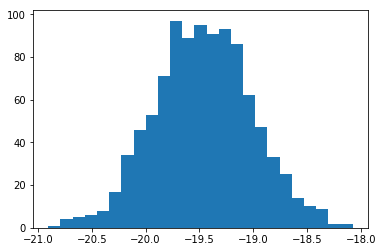

In [12]:
plt.hist(avg_objective_none_max, bins = 25)

Current Fee System

In [2]:
objective_current = []
resources_wasted_current = []
objective_func_current = [-1, -0.4, -0.25, 1] 
# -1 for not showing up, -0.4 for no show fee, -0.25 for late cancellation, 
#1 for patients aware of punishment who show up for what they were intended to miss

for iteration in range(iterations):
    day = 0
    temp_objective_current = []
    temp_resources_wasted_current = []
    
    while day < intervals:
        no_show_rate = numpy.random.normal(loc=0.2685272, scale=0.09121678, size=1)[0]
        patients_visit = int(numpy.random.normal(62.476, scale=16.72728))
        if no_show_rate < min_rate:
             no_show_rate = min_rate
        if patients_visit < 40:
            patients_visit = 40
        patients_show = int(numpy.random.binomial(patients_visit, 1 - no_show_rate) + 0.5)
        patients_no_show = patients_visit - patients_show

        patients_not_showing = int(numpy.random.binomial(patients_no_show, 0.3478166) + 0.5)
        patients_late_cancel = patients_no_show - patients_not_showing

        #data shows that the difference between no show rate before and after fee system is 0.3% -- statistically insignificant
        force_rate = 0.0028462 #from potential no show patients to come to the appointment
        late_cancel_rate = 0.02260969 # patients who will not show up will now consider late cancellation as option to save money

        patients_changing_mind = int(numpy.random.binomial(patients_no_show, 0.0028462) + 0.5)
        patients_changing_late = int(numpy.random.binomial(patients_not_showing, 0.02260969) + 0.5)

        patients_no_show = patients_no_show - patients_changing_mind
        patients_not_showing -= patients_changing_late - patients_changing_mind
        patients_late_cancel += patients_changing_late
        
        result = [patients_no_show, patients_not_showing, patients_late_cancel, patients_changing_mind]
        
        obj_result = 0
        for i in range(len(result)):
            obj_result += objective_func_current[i] * result[i]
        temp_resources_wasted_current.append(result)
        temp_objective_current.append(obj_result)
        
        day = day + 1
   
    objective_current.append(temp_objective_current)
    resources_wasted_current.append(temp_resources_wasted_current)
    
    

In [4]:
avg_objective_current = []
avg_no_show_current = []
avg_not_showing_current = []
avg_late_cancel_current = []
avg_changing_mind_current = []


for iter in range(iterations):
    avg_objective_current.append(mean(objective_current[iter]))
    sum_no_show = 0
    sum_not_showing = 0
    sum_late_cancel = 0
    sum_changing = 0
    for j in range(intervals):
        sum_no_show += resources_wasted_current[iter][j][0]
        sum_not_showing += resources_wasted_current[iter][j][1]
        sum_late_cancel += resources_wasted_current[iter][j][2]
        sum_changing += resources_wasted_current[iter][j][3]
    avg_no_show_current.append(sum_no_show / intervals)
    avg_not_showing_current.append(sum_not_showing / intervals)
    avg_late_cancel_current.append(sum_late_cancel / intervals)
    avg_changing_mind_current.append(sum_changing / intervals)
        

In [281]:
avg_avg_objective_current = mean(avg_objective_current)
avg_avg_objective_current
stdev(avg_objective_current)

0.6326272545331715

In [5]:
avg_avg_no_show_current = mean(avg_no_show_current)
avg_avg_no_show_current

16.904872

In [6]:
avg_avg_not_showing_current = mean(avg_not_showing_current)
avg_avg_not_showing_current

5.808732

In [7]:
avg_avg_late_cancel_current = mean(avg_late_cancel_current)
avg_avg_late_cancel_current

11.192236

In [8]:
avg_avg_changing_mind_current = mean(avg_changing_mind_current)
avg_avg_changing_mind_current

0.048048

(array([  2.,   2.,   7.,  17.,  17.,  23.,  36.,  58.,  70.,  77.,  99.,
         99., 102., 103.,  81.,  66.,  55.,  39.,  19.,   7.,  10.,   4.,
          1.,   4.,   2.]),
 array([-23.8232  , -23.670312, -23.517424, -23.364536, -23.211648,
        -23.05876 , -22.905872, -22.752984, -22.600096, -22.447208,
        -22.29432 , -22.141432, -21.988544, -21.835656, -21.682768,
        -21.52988 , -21.376992, -21.224104, -21.071216, -20.918328,
        -20.76544 , -20.612552, -20.459664, -20.306776, -20.153888,
        -20.001   ]),
 <a list of 25 Patch objects>)

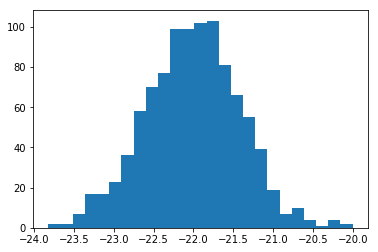

In [31]:
plt.hist(avg_objective_current, bins = 25)

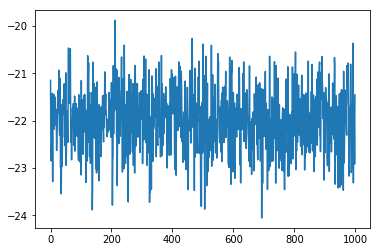

In [26]:
plt.plot(avg_objective_current)

In [32]:
# stress test when potential patients coming in are maxed

objective_current_max = []
resources_wasted_current_max = []
objective_func_current_max = [-1, -0.4, -0.25, 1] 
# -1 for not showing up, -0.4 for no show fee, -0.25 for late cancellation, 
#1 for patients aware of punishment who show up for what they were intended to miss

for iteration in range(iterations):
    day = 0
    temp_objective_current_max = []
    temp_resources_wasted_current_max = []
    
    while day < intervals:
        no_show_rate = numpy.random.normal(loc=0.2685272, scale=0.09121678, size=1)[0]
        patients_visit = 4 * 9 * 2
        if no_show_rate < min_rate:
             no_show_rate = min_rate
        patients_show = int(numpy.random.binomial(patients_visit, 1 - no_show_rate) + 0.5)
        patients_no_show = patients_visit - patients_show

        patients_not_showing = int(numpy.random.binomial(patients_no_show, 0.3478166) + 0.5)
        patients_late_cancel = patients_no_show - patients_not_showing

        #data shows that the difference between no show rate before and after fee system is 0.3% -- statistically insignificant
        force_rate = 0.0028462 #from potential no show patients to come to the appointment
        late_cancel_rate = 0.02260969 # patients who will not show up will now consider late cancellation as option to save money

        patients_changing_mind = int(numpy.random.binomial(patients_no_show, 0.0028462) + 0.5)
        patients_changing_late = int(numpy.random.binomial(patients_not_showing, 0.02260969) + 0.5)

        patients_no_show = patients_no_show - patients_changing_mind
        patients_not_showing -= patients_changing_late - patients_changing_mind
        patients_late_cancel += patients_changing_late
        
        result = [patients_no_show, patients_not_showing, patients_late_cancel, patients_changing_mind]
        
        obj_result = 0
        for i in range(len(result)):
            obj_result += objective_func_current[i] * result[i]
        temp_resources_wasted_current_max.append(result)
        temp_objective_current_max.append(obj_result)
        
        day = day + 1
   
    objective_current_max.append(temp_objective_current_max)
    resources_wasted_current_max.append(temp_resources_wasted_current_max)
    
    

In [33]:
avg_objective_current_max = []
for iter in range(iterations):
    avg_objective_current_max.append(mean(objective_current_max[iter]))

In [34]:
avg_avg_objective_current_max = mean(avg_objective_current_max)
avg_avg_objective_current_max

-25.2602196

(array([  5.,   2.,   7.,  10.,  14.,  27.,  25.,  50.,  67.,  71.,  73.,
         93.,  78., 109., 111.,  69.,  57.,  36.,  41.,  23.,  10.,   7.,
          6.,   6.,   3.]),
 array([-27.014  , -26.87352, -26.73304, -26.59256, -26.45208, -26.3116 ,
        -26.17112, -26.03064, -25.89016, -25.74968, -25.6092 , -25.46872,
        -25.32824, -25.18776, -25.04728, -24.9068 , -24.76632, -24.62584,
        -24.48536, -24.34488, -24.2044 , -24.06392, -23.92344, -23.78296,
        -23.64248, -23.502  ]),
 <a list of 25 Patch objects>)

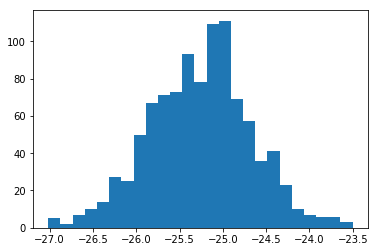

In [35]:
plt.hist(avg_objective_current_max, bins = 25)

In [9]:
sunshine_morning = [0.09, 0.10, 0.19, 0.14, 0.18, 0.13, 0.17]
sunshine_afternoon = [0.07, 0.13, 0.21, 0.12, 0.17, 0.15, 0.15]
sunshine_array = []
sunshine_array.append(sunshine_morning)
sunshine_array.append(sunshine_afternoon)

Overbooking System

In [10]:
def SlotSimulator(num_patients, sunshine):
    slots = []
    new_slots = []
    waiting = []
    for i in range(7):
        slots.append(0)

    for i in range(9):
        waiting.append(0)
        new_slots.append(0)
    # randomize the slot
    i = 0
    for i in range(7):
        slots[i] = numpy.random.binomial(2, sunshine_array[sunshine][i])
    while sum(slots) < num_patients and sum(slots) < 14:
        index = random.randint(0,6)
        if slots[index] < 2:
            slots[index] += 1
     
    slots_used = 0
    slots_used_no_show = 0
    total_visit_slots = max(sum(slots), num_patients)
    old_slots = []
    # who will not show up??
    for i in range(7):
        tempon = numpy.random.binomial(slots[i], 1 - no_show_rate)
        new_slots[i] = tempon
        old_slots.append(tempon)
        if slots[i] > 0:
            slots_used += 1
        if new_slots[i] > 0:
            slots_used_no_show += 1
        
   
    slots_no_show = sum(new_slots)
    # simulate complete
    for i in range(len(new_slots)):
        if new_slots[i] >= 1 and waiting[i] == 0:
            if i < 8:
                waiting[i+1] = new_slots[i] - 1
            new_slots[i] = 1
        elif new_slots[i] >= 1 and waiting[i] > 0:
            if i < 8:
                waiting[i+1] = new_slots[i] + waiting[i] - 1
            new_slots[i] = 1
        elif new_slots[i] == 0 and waiting[i] > 0:
            new_slots[i] = 1
            if i < 8:
                waiting[i+1] = waiting[i] - 1
            for j in range(i-2, i+1):
                tempo = waiting[j] - 1
                waiting[j] = max(0, tempo)
                
        # after waiting one hour patients will reschedule
        if i >= 2 and i < 8 and waiting[i-2] > 0:
            temp = waiting[i+1] - waiting[i-2]
            waiting[i+1] = max(0, temp)
            for j in range(i-2,i):
                temp2 = waiting[j] - waiting[i-2]
                waiting[j] = max(0, temp2)
        
    slot_potential_wasted = slots_used - slots_used_no_show
    give_up = slots_no_show - sum(new_slots)
    wait_only_one_time = sum(new_slots) - slots_used_no_show
    loss_prevented = sum(new_slots) - slots_used_no_show

    return [slot_potential_wasted, give_up, wait_only_one_time, loss_prevented]   

In [12]:
objective_over = []
resources_wasted_over = [] #due to no show patients (captured by diff between potential slot used and actual used)
available_slots_over = [] #more patients coming to clinic = more patients need to reschedule
objective_func_over = [-1, -1.5, -0.25, -0.6, -0.15, 0.5]
# -1: no show (slot-wise), -1.5: waiting too long to reschedule, -0.25: waiting just for one slot, 0: no waiting
# -0.6: too packed (worst case), -0.15 : ok packed, 0: no packed, 0.5: slot created by letting patients wait

for iteration in range(iterations):
    day = 0
    temp_objective_over = []
    temp_resources_wasted_over = []
    temp_available_slots_over = []
    
    while day < intervals:
        no_show_rate = numpy.random.normal(loc=0.2685272, scale=0.09121678, size=1)[0]
        patients_visit = int(numpy.random.normal(62.476, scale=16.72728))
        if no_show_rate < min_rate:
             no_show_rate = min_rate
        if patients_visit < 40:
            patients_visit = 40
        if patients_visit > 112:
            patients_visit = 112
        
        #randomize each slot to "therapist" (notice: therapists in this case is not just one, but share the same slots)
        therapists_patients = []
        patients_per_therapist = int(patients_visit / num_therapists)
        for i in range(num_therapists):
            therapists_patients.append(patients_per_therapist)
        i = 0
        while sum(therapists_patients) < patients_visit:
            therapists_patients[i] += 1
            i += 1

                     
        #slots are divided by 2 section: morning and afternoon
        # for each morning and afternoon, there are 7 slots (8-11:30, 1-4:30) and 2 open slots (11:30~12:30 and 4:30~5:30)
        slots_wasted = 0
        patients_give_up = 0
        patients_wait_one_time = 0
        slots_created = 0
        ys = []
        for therapist in range(len(therapists_patients)):
            visit_morning = int(therapists_patients[therapist] / 2 + 2.52)
            visit_afternoon = therapists_patients[therapist] - visit_morning 
           
            morning_result_therapist = SlotSimulator(visit_morning, 0)
            afternoon_result_therapist = SlotSimulator(visit_afternoon, 1)
            
            slots_wasted += morning_result_therapist[0] + afternoon_result_therapist[0]
            patients_give_up += morning_result_therapist[1] + afternoon_result_therapist[1]
            patients_wait_one_time += morning_result_therapist[2] + afternoon_result_therapist[2]
            ys.append(visit_morning + visit_afternoon - 14)
            
            slots_created += morning_result_therapist[3] + afternoon_result_therapist[3]
        ok_packed = 0
        too_packed = 0
        for y in range(len(ys)):
            if y > 0 and y <= 2:
                ok_packed += 1
            elif y > 2:
                too_packed += 1
        
        result = [slots_wasted, patients_give_up, patients_wait_one_time, too_packed, ok_packed, slots_created]
        obj_result = 0
        for i in range(len(objective_func_over)):
            obj_result += objective_func_over[i] * result[i]
                   
        temp_objective_over.append(obj_result)
        temp_resources_wasted_over.append([slots_wasted, too_packed, ok_packed, slots_created])
        temp_available_slots_over.append([patients_give_up, patients_wait_one_time])
        day = day + 1

    objective_over.append(temp_objective_over)
    resources_wasted_over.append(temp_resources_wasted_over)
    available_slots_over.append(temp_available_slots_over)
        

In [13]:
avg_objective_over = []
avg_wasted_over = []
avg_give_up_over = []
avg_wait_over = []
for iter in range(iterations):
    avg_objective_over.append(mean(objective_over[iter]))
    sum_wasted = 0
    sum_give_up = 0
    sum_wait = 0
    for j in range(intervals):
        sum_wasted += resources_wasted_over[iter][j][0]
        sum_give_up += available_slots_over[iter][j][0]
        sum_wait += available_slots_over[iter][j][1]
    avg_wasted_over.append(sum_wasted / intervals)
    avg_give_up_over.append(sum_give_up / intervals)
    avg_wait_over.append(sum_wait / intervals)
    

In [19]:
avg_avg_objective_over = mean(avg_objective_over)
avg_avg_objective_over

-12.486207

In [15]:
avg_avg_wasted_over = mean(avg_wasted_over)
avg_avg_wasted_over

7.02128

In [16]:
avg_avg_give_up_over = mean(avg_give_up_over)
avg_avg_give_up_over

4.280284

In [17]:
avg_avg_wait_over = mean(avg_wait_over)
avg_avg_wait_over

7.421996

In [18]:
avg_avg_slots_created_over = mean(avg_slots_created_over)
avg_avg_slots_created_over

7.421996

(array([  2.,   4.,   6.,   5.,  20.,  21.,  31.,  60.,  57.,  82.,  81.,
         99., 113.,  89., 101.,  86.,  40.,  43.,  24.,  19.,   8.,   6.,
          2.,   0.,   1.]),
 array([-8.4754 , -8.41656, -8.35772, -8.29888, -8.24004, -8.1812 ,
        -8.12236, -8.06352, -8.00468, -7.94584, -7.887  , -7.82816,
        -7.76932, -7.71048, -7.65164, -7.5928 , -7.53396, -7.47512,
        -7.41628, -7.35744, -7.2986 , -7.23976, -7.18092, -7.12208,
        -7.06324, -7.0044 ]),
 <a list of 25 Patch objects>)

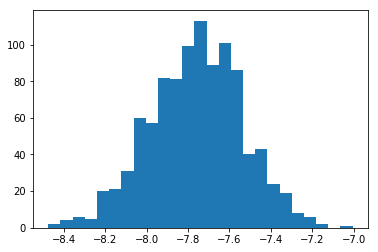

In [217]:
plt.hist(avg_objective_over, bins = 25)

(array([ 3.,  6.,  2.,  7., 17., 34., 24., 35., 58., 55., 70., 82., 98.,
        99., 90., 87., 64., 54., 41., 24., 23., 12.,  7.,  5.,  3.]),
 array([6.896 , 6.9368, 6.9776, 7.0184, 7.0592, 7.1   , 7.1408, 7.1816,
        7.2224, 7.2632, 7.304 , 7.3448, 7.3856, 7.4264, 7.4672, 7.508 ,
        7.5488, 7.5896, 7.6304, 7.6712, 7.712 , 7.7528, 7.7936, 7.8344,
        7.8752, 7.916 ]),
 <a list of 25 Patch objects>)

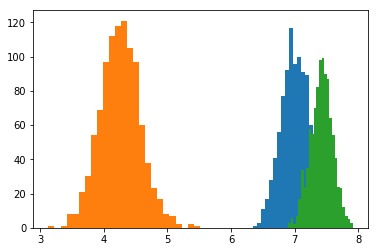

In [219]:
plt.hist(avg_wasted_over, bins = 25)
plt.hist(avg_give_up_over, bins = 25)
plt.hist(avg_wait_over, bins = 25)

In [299]:
#Stress Test
def SlotSimulator_max(num_patients, sunshine):
    slots = []
    new_slots = []
    waiting = []
    for i in range(7):
        slots.append(0)

    for i in range(9):
        waiting.append(0)
        new_slots.append(0)
    # randomize the slot
    i = 0
    for i in range(7):
        slots[i] = numpy.random.binomial(2, sunshine_array[sunshine][i])
    while sum(slots) < num_patients and sum(slots) < 14:
        index = random.randint(0,6)
        if slots[index] < 2:
            slots[index] += 1
     
    slots_used = 0
    slots_used_no_show = 0
    total_visit_slots = max(sum(slots), num_patients)
    old_slots = []
    # who will not show up??
    for i in range(7):
        tempon = numpy.random.binomial(slots[i], 1)
        new_slots[i] = tempon
        old_slots.append(tempon)
        if slots[i] > 0:
            slots_used += 1
        if new_slots[i] > 0:
            slots_used_no_show += 1
        
   
    slots_no_show = sum(new_slots)
    # simulate complete
    for i in range(len(new_slots)):
        if new_slots[i] >= 1 and waiting[i] == 0:
            if i < 8:
                waiting[i+1] = new_slots[i] - 1
            new_slots[i] = 1
        elif new_slots[i] >= 1 and waiting[i] > 0:
            if i < 8:
                waiting[i+1] = new_slots[i] + waiting[i] - 1
            new_slots[i] = 1
        elif new_slots[i] == 0 and waiting[i] > 0:
            new_slots[i] = 1
            if i < 8:
                waiting[i+1] = waiting[i] - 1
            for j in range(i-2, i+1):
                tempo = waiting[j] - 1
                waiting[j] = max(0, tempo)
                
        # after waiting one hour patients will reschedule
        if i >= 2 and i < 8 and waiting[i-2] > 0:
            temp = waiting[i+1] - waiting[i-2]
            waiting[i+1] = max(0, temp)
            for j in range(i-2,i):
                temp2 = waiting[j] - waiting[i-2]
                waiting[j] = max(0, temp2)
        
    slot_potential_wasted = slots_used - slots_used_no_show
    give_up = slots_no_show - sum(new_slots)
    wait_only_one_time = sum(new_slots) - slots_used_no_show
    loss_prevented = sum(new_slots) - slots_used_no_show

    return [slot_potential_wasted, give_up, wait_only_one_time, loss_prevented]   

In [316]:
objective_over_max = []
resources_wasted_over_max = [] #due to no show patients (captured by diff between potential slot used and actual used)
available_slots_over_max = [] #more patients coming to clinic = more patients need to reschedule
objective_func_over_max = [-1, -1.5, -0.25, -0.6, -0.15, 0.5]
# -1: no show (slot-wise), -0.4: waiting too long to reschedule, -0.2: waiting just for one slot, 0: no waiting
# -0.6: too packed (worst case), -0.15 : ok packed, 0: no packed, 0.6: slot created by letting patients wait

for iteration in range(1):
    day = 0
    temp_objective_over_max = []
    temp_resources_wasted_over_max = []
    temp_available_slots_over_max = []
    
    while day < intervals:
        patients_visit = 14 * 4 * 2
        
        #randomize each slot to "therapist" (notice: therapists in this case is not just one, but share the same slots)
        therapists_patients = []
        patients_per_therapist = int(patients_visit / num_therapists)
        for i in range(num_therapists):
            therapists_patients.append(patients_per_therapist)
                     
        #slots are divided by 2 section: morning and afternoon
        # for each morning and afternoon, there are 7 slots (8-11:30, 1-4:30) and 2 open slots (11:30~12:30 and 4:30~5:30)
        slots_wasted = 0
        patients_give_up = 0
        patients_wait_one_time = 0
        slots_created = 0
        ys = []
        for therapist in range(len(therapists_patients)):
            visit_morning = int(therapists_patients[therapist] / 2)
            visit_afternoon = therapists_patients[therapist] - visit_morning 
           
            morning_result_therapist = SlotSimulator_max(visit_morning, 0)
            afternoon_result_therapist = SlotSimulator_max(visit_afternoon, 1)
            
            slots_wasted += morning_result_therapist[0] + afternoon_result_therapist[0]
            patients_give_up += morning_result_therapist[1] + afternoon_result_therapist[1]
            patients_wait_one_time += morning_result_therapist[2] + afternoon_result_therapist[2]
            ys.append(visit_morning + visit_afternoon - 14)
            slots_created += morning_result_therapist[3] + afternoon_result_therapist[3]
        
        ok_packed = 0
        too_packed = 0
        for y in range(len(ys)):
            if y > 0 and y <= 2:
                ok_packed += 1
            elif y > 2:
                too_packed += 1
        
        result = [slots_wasted, patients_give_up, patients_wait_one_time, too_packed, ok_packed, slots_created]
        obj_result = 0
        for i in range(len(objective_func_over)):
            obj_result += objective_func_over_max[i] * result[i]
                   
        temp_objective_over_max.append(obj_result)
        available_slots_over_max.append(patients_give_up)
        day = day + 1
    objective_over_max.append(temp_objective_over_max)
        

In [304]:
avg_objective_over_max = []
for iter in range(1):
    avg_objective_over_max.append(mean(objective_over_max[iter]))

In [317]:
available_slots_over_max

[56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,


In [305]:
avg_avg_objective_over_max = mean(avg_objective_over_max)
avg_avg_objective_over_max

-84.89999999999999

Fee on Frequent System

In [20]:
objective_freq = []
resources_wasted_freq = [] #by no show
objective_func_freq = [-1, -0.5, -0.3, 1] 

for iteration in range(iterations):
    day = 0
    temp_objective_freq = []
    temp_resources_wasted_freq = []
    
    while day < intervals:
        no_show_rate = numpy.random.normal(loc=0.2685272, scale=0.09121678, size=1)[0]
        patients_visit = int(numpy.random.normal(62.476, scale=16.72728))
        if no_show_rate < min_rate:
             no_show_rate = min_rate
        if patients_visit < 40:
            patients_visit = 40
        patients_show = int(numpy.random.binomial(patients_visit, 1 - no_show_rate) + 0.5)
        patients_no_show = patients_visit - patients_show
        
        patients_no_show_freq = int(numpy.random.binomial(patients_no_show, 0.379822) + 0.5)
        
        patients_not_showing = int(numpy.random.binomial(patients_no_show_freq, 0.3478166) + 0.5)
        patients_late_cancel = patients_no_show_freq - patients_not_showing

        #Assumption: late cancellation and no show will treats the same, 
        #but when they did not show up second time, there will be different fee imposed on late cancel and no show
        #data shows that the difference between no show rate before and after fee system is 0.3% -- statistically insignificant
        force_rate = 0.0028462 * 3 
        #from potential no show patients to come to the appointment
        #if some patient did not show up, they have pressure to show up next!
        late_cancel_rate = 0.02260969 * 30 / 25
        # patients who will not show up will now consider late cancellation as option to save money (would be same)

        patients_changing_mind = int(numpy.random.binomial(patients_no_show, force_rate) + 0.5)
        patients_changing_late = int(numpy.random.binomial(patients_not_showing, late_cancel_rate) + 0.5)

        patients_no_show = patients_no_show - patients_changing_mind
        patients_not_showing -= patients_changing_late - patients_changing_mind
        patients_late_cancel += patients_changing_late
        
        result = [patients_no_show, patients_not_showing, patients_late_cancel, patients_changing_mind]
        
        obj_result = 0
        for i in range(len(result)):
            obj_result += objective_func_freq[i] * result[i]
        temp_resources_wasted_freq.append(result)
        temp_objective_freq.append(obj_result)
        
        day = day + 1
   
    objective_freq.append(temp_objective_freq)
    resources_wasted_freq.append(temp_resources_wasted_freq)
    
    

In [21]:
avg_objective_freq = []
avg_no_show_freq = []
avg_not_showing_freq = []
avg_late_cancel_freq = []
avg_changing_mind_freq = []
for iter in range(iterations):
    avg_objective_freq.append(mean(objective_freq[iter]))
    sum_patients_no_show = 0
    sum_patients_not_showing = 0
    sum_patients_late_cancel = 0
    sum_patients_changing_mind = 0
    for j in range(intervals):
        sum_patients_no_show += resources_wasted_freq[iter][j][0]
        sum_patients_not_showing += resources_wasted_freq[iter][j][1]
        sum_patients_late_cancel += resources_wasted_freq[iter][j][2]
        sum_patients_changing_mind += resources_wasted_freq[iter][j][3]
    avg_no_show_freq.append(sum_patients_no_show / intervals)
    avg_not_showing_freq.append(sum_patients_not_showing / intervals)
    avg_late_cancel_freq.append(sum_patients_late_cancel / intervals)
    avg_changing_mind_freq.append(sum_patients_changing_mind / intervals)

In [22]:
avg_avg_objective_freq = mean(avg_objective_freq)
avg_avg_objective_freq
stdev(avg_objective_freq)

0.5472514437648407

In [23]:
avg_avg_no_show_freq = mean(avg_no_show_freq)
avg_avg_no_show_freq

16.819064

In [24]:
avg_avg_not_showing_freq = mean(avg_not_showing_freq)
avg_avg_not_showing_freq

2.323288

In [25]:
avg_avg_late_cancel_freq = mean(avg_late_cancel_freq)
avg_avg_late_cancel_freq

4.27524

In [26]:
avg_avg_changing_mind_freq= mean(avg_changing_mind_freq)
avg_avg_changing_mind_freq

0.14404

(array([  2.,   3.,   2.,  11.,  13.,  34.,  42.,  66.,  51.,  93.,  94.,
        107.,  79.,  97.,  72.,  66.,  57.,  36.,  34.,  19.,  10.,   7.,
          3.,   1.,   1.]),
 array([-20.8036  , -20.663952, -20.524304, -20.384656, -20.245008,
        -20.10536 , -19.965712, -19.826064, -19.686416, -19.546768,
        -19.40712 , -19.267472, -19.127824, -18.988176, -18.848528,
        -18.70888 , -18.569232, -18.429584, -18.289936, -18.150288,
        -18.01064 , -17.870992, -17.731344, -17.591696, -17.452048,
        -17.3124  ]),
 <a list of 25 Patch objects>)

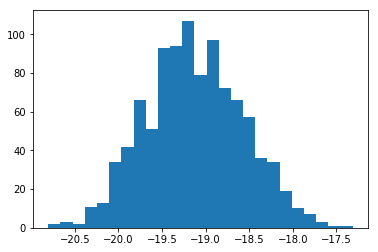

In [67]:
plt.hist(avg_objective_freq, bins = 25)

(array([  1.,   2.,   1.,  14.,  23.,  22.,  55.,  72.,  51., 127., 142.,
         51., 122.,  45.,  85.,  69.,  23.,  38.,  25.,   9.,  14.,   2.,
          2.,   2.,   3.]),
 array([0.068  , 0.07456, 0.08112, 0.08768, 0.09424, 0.1008 , 0.10736,
        0.11392, 0.12048, 0.12704, 0.1336 , 0.14016, 0.14672, 0.15328,
        0.15984, 0.1664 , 0.17296, 0.17952, 0.18608, 0.19264, 0.1992 ,
        0.20576, 0.21232, 0.21888, 0.22544, 0.232  ]),
 <a list of 25 Patch objects>)

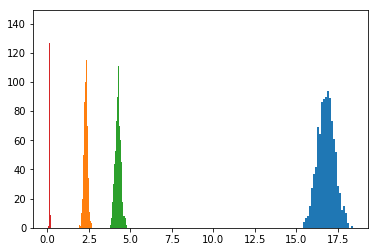

In [231]:
plt.hist(avg_no_show_freq, bins = 25)
plt.hist(avg_not_showing_freq, bins = 25)
plt.hist(avg_late_cancel_freq, bins = 25)
plt.hist(avg_changing_mind_freq, bins = 25)

In [74]:
#Stress Test
objective_freq_max = []
resources_wasted_freq_max = [] #by no show
objective_func_freq_max = [-1, -0.5, -0.3, 1] 

for iteration in range(iterations):
    day = 0
    temp_objective_freq_max = []
    temp_resources_wasted_freq_max = []
    
    while day < intervals:
        no_show_rate = numpy.random.normal(loc=0.2685272, scale=0.09121678, size=1)[0]
        patients_visit = 4 * 9 * 2
        if no_show_rate < min_rate:
             no_show_rate = min_rate
        if patients_visit < 40:
            patients_visit = 40
        patients_show = int(numpy.random.binomial(patients_visit, 1 - no_show_rate) + 0.5)
        patients_no_show = patients_visit - patients_show
        
        patients_no_show_freq = int(numpy.random.binomial(patients_no_show, 0.379822) + 0.5)
        
        patients_not_showing = int(numpy.random.binomial(patients_no_show_freq, 0.3478166) + 0.5)
        patients_late_cancel = patients_no_show_freq - patients_not_showing

        #Assumption: late cancellation and no show will treats the same, 
        #but when they did not show up second time, there will be different fee imposed on late cancel and no show
        #data shows that the difference between no show rate before and after fee system is 0.3% -- statistically insignificant
        force_rate = 0.0028462 * 3 
        #from potential no show patients to come to the appointment
        #if some patient did not show up, they have pressure to show up next!
        late_cancel_rate = 0.02260969 * 30 / 25
        # patients who will not show up will now consider late cancellation as option to save money (would be same)

        patients_changing_mind = int(numpy.random.binomial(patients_no_show, force_rate) + 0.5)
        patients_changing_late = int(numpy.random.binomial(patients_not_showing, late_cancel_rate) + 0.5)

        patients_no_show = patients_no_show - patients_changing_mind
        patients_not_showing -= patients_changing_late - patients_changing_mind
        patients_late_cancel += patients_changing_late
        
        result = [patients_no_show, patients_not_showing, patients_late_cancel, patients_changing_mind]
        
        obj_result = 0
        for i in range(len(result)):
            obj_result += objective_func_freq[i] * result[i]
        temp_resources_wasted_freq_max.append(result)
        temp_objective_freq_max.append(obj_result)
        
        day = day + 1
   
    objective_freq_max.append(temp_objective_freq_max)
    resources_wasted_freq_max.append(temp_resources_wasted_freq_max)
    
    


In [75]:
avg_objective_freq_max = []
for iter in range(iterations):
    avg_objective_freq_max.append(mean(objective_freq_max[iter]))

In [76]:
avg_avg_objective_freq_max = mean(avg_objective_freq_max)
avg_avg_objective_freq_max

-21.9410208

(array([  2.,   6.,   8.,  14.,  15.,  31.,  40.,  64.,  70.,  93., 111.,
         97., 107.,  83.,  82.,  63.,  39.,  23.,  22.,  15.,   5.,   5.,
          2.,   2.,   1.]),
 array([-23.4572  , -23.325424, -23.193648, -23.061872, -22.930096,
        -22.79832 , -22.666544, -22.534768, -22.402992, -22.271216,
        -22.13944 , -22.007664, -21.875888, -21.744112, -21.612336,
        -21.48056 , -21.348784, -21.217008, -21.085232, -20.953456,
        -20.82168 , -20.689904, -20.558128, -20.426352, -20.294576,
        -20.1628  ]),
 <a list of 25 Patch objects>)

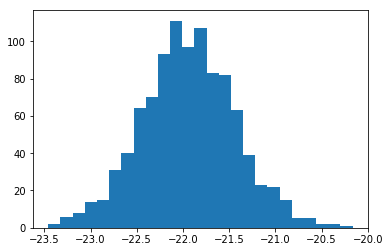

In [77]:
plt.hist(avg_objective_freq_max, bins = 25)

Mixed Overboooking System

Mixture of double booking allowed in limited time and single booking otherwise:
Morning: 8:00~10:30 double booking, 10:30~12:30 single booking
Afternoon: 1:00~3:30 double booking, 3:30-5:30 single booking

In [27]:
sunshine_array2 = []
sunshine_morning = [0.07335211, 0.07966197, 0.15966197, 0.11729577, 0.14783099, 0.10929577, 0.13791549, 0.13577465, 0.03921127]
sunshine_afternoon = [0.06945245, 0.07089337, 0.14164265, 0.21801153, 0.12463977, 0.15389049, 0.15720461, 0.04293948, 0.02132565]
sunshine_array2.append(sunshine_morning)
sunshine_array2.append(sunshine_afternoon)

In [28]:
def SlotSimulator_mixed(num_patients, sunshine):
    slots = []
    new_slots = []
    waiting = []  

    for i in range(9):
        slots.append(0)
        waiting.append(0)
        new_slots.append(0)
        
    # randomize the slot
    i = 0
    for i in range(5):
        slots[i] = numpy.random.binomial(2, sunshine_array2[sunshine][i])
    for i in range(5,9):
        slots[i] = numpy.random.binomial(1, sunshine_array2[sunshine][i])
    while sum(slots) < num_patients and sum(slots) < 14:
        index = random.randint(0,8)
        if slots[index] < 2 and index < 5:
            slots[index] += 1
        elif slots[index] < 1 and index >= 5 and index < 9:
            slots[index] += 1
    slots_used = 0
    slots_used_no_show = 0
    total_visit_slots = max(sum(slots), num_patients)
    old_slots = []
    # who will not show up??
    for i in range(7):
        tempon = numpy.random.binomial(slots[i], 1 - no_show_rate)
        new_slots[i] = tempon
        old_slots.append(tempon)
        if slots[i] > 0:
            slots_used += 1
        if new_slots[i] > 0:
            slots_used_no_show += 1
        
   
    slots_no_show = sum(new_slots)
    # simulate complete
    for i in range(len(new_slots)):
        if new_slots[i] >= 1 and waiting[i] == 0:
            if i < 8:
                waiting[i+1] = new_slots[i] - 1
            new_slots[i] = 1
        elif new_slots[i] >= 1 and waiting[i] > 0:
            if i < 8:
                waiting[i+1] = new_slots[i] + waiting[i] - 1
            new_slots[i] = 1
        elif new_slots[i] == 0 and waiting[i] > 0:
            new_slots[i] = 1
            if i < 8:
                waiting[i+1] = waiting[i] - 1
            for j in range(i-2, i+1):
                tempo = waiting[j] - 1
                waiting[j] = max(0, tempo)
                
        # after waiting one hour patients will reschedule
        if i >= 2 and i < 8 and waiting[i-2] > 0:
            temp = waiting[i+1] - waiting[i-2]
            waiting[i+1] = max(0, temp)
            for j in range(i-2,i):
                temp2 = waiting[j] - waiting[i-2]
                waiting[j] = max(0, temp2)
        
    slot_potential_wasted = slots_used - slots_used_no_show
    give_up = slots_no_show - sum(new_slots)
    wait_only_one_time = sum(new_slots) - slots_used_no_show
    loss_prevented = sum(new_slots) - slots_used_no_show

    return [slot_potential_wasted, give_up, wait_only_one_time, loss_prevented]   

In [29]:
objective_mixed = []
resources_wasted_mixed = []
available_slots_mixed = []
objective_func_mixed = [-1, -1.5, -0.25, -0.6, -0.15, 0.5]
# -1: no show (slot-wise), -0.4: waiting too long to reschedule, -0.2: waiting just for one slot, 0: no waiting
# -0.6: too packed (worst case), -0.15 : ok packed, 0: no packed, 0.6: slot created by letting patients wait


for iteration in range(iterations):
    day = 0
    temp_objective_mixed = []
    temp_resources_wasted_mixed = []
    temp_available_slots_mixed = []
    
    while day < intervals:
        no_show_rate = numpy.random.normal(loc=0.2685272, scale=0.09121678, size=1)[0]
        patients_visit = int(numpy.random.normal(62.476, scale=16.72728))
        if no_show_rate < min_rate:
             no_show_rate = min_rate
        if patients_visit < 40:
            patients_visit = 40
        
        therapists_patients = []
        patients_per_therapist = int(patients_visit / num_therapists)
        for i in range(num_therapists):
            therapists_patients.append(patients_per_therapist)
        i = 0
        while sum(therapists_patients) < patients_visit:
            therapists_patients[i] += 1
            i += 1
        
        slots_wasted = 0
        patients_give_up = 0
        patients_wait_one_time = 0
        slots_created = 0
        ys = []
        
        for therapist in range(len(therapists_patients)):
            visit_morning = int(therapists_patients[therapist] / 2 + 2.52)
            visit_afternoon = therapists_patients[therapist] - visit_morning 
           
            morning_result_therapist = SlotSimulator_mixed(visit_morning, 0)
            afternoon_result_therapist = SlotSimulator_mixed(visit_afternoon, 1)
            
            slots_wasted += morning_result_therapist[0] + afternoon_result_therapist[0]
            patients_give_up += morning_result_therapist[1] + afternoon_result_therapist[1]
            patients_wait_one_time += morning_result_therapist[2] + afternoon_result_therapist[2]
            ys.append(visit_morning + visit_afternoon - 14)
            
            slots_created += morning_result_therapist[3] + afternoon_result_therapist[3]
        
        ok_packed = 0
        too_packed = 0
        for y in range(len(ys)):
            if y > 0 and y <= 2:
                ok_packed += 1
            elif y > 2:
                too_packed += 1
            
        ok_packed = 0
        too_packed = 0
        for y in range(len(ys)):
            if y > 0 and y <= 2:
                ok_packed += 1
            elif y > 2:
                too_packed += 1
        
        result = [slots_wasted, patients_give_up, patients_wait_one_time, too_packed, ok_packed, slots_created]
        obj_result = 0
        for i in range(len(objective_func_over)):
            obj_result += objective_func_mixed[i] * result[i]
        
        temp_objective_mixed.append(obj_result) 
        temp_resources_wasted_mixed.append([slots_wasted, too_packed, ok_packed])
        temp_available_slots_mixed.append([patients_give_up, patients_wait_one_time])
        day = day + 1

    objective_mixed.append(temp_objective_mixed)
    resources_wasted_mixed.append(temp_resources_wasted_mixed)
    available_slots_mixed.append(temp_available_slots_mixed)
        
    

In [30]:
avg_objective_mixed = []
avg_wasted_mixed = []
avg_give_up_mixed = []
avg_wait_mixed = []
for iter in range(iterations):
    avg_objective_mixed.append(mean(objective_mixed[iter]))
    sum_wasted = 0
    sum_give_up = 0
    sum_wait = 0
    for j in range(intervals):
        sum_wasted += resources_wasted_mixed[iter][j][0]
        sum_give_up += available_slots_mixed[iter][j][0]
        sum_wait += available_slots_mixed[iter][j][1]
    avg_wasted_mixed.append(sum_wasted / intervals)
    avg_give_up_mixed.append(sum_give_up / intervals)
    avg_wait_mixed.append(sum_wait / intervals)

In [31]:
avg_avg_objective_mixed = mean(avg_objective_mixed)
avg_avg_objective_mixed

-11.296646

In [32]:
avg_avg_wasted_mixed = mean(avg_wasted_mixed)
avg_avg_wasted_mixed

7.801604

In [33]:
avg_avg_give_up_mixed = mean(avg_give_up_mixed)
avg_avg_give_up_mixed

2.576856

In [34]:
avg_avg_wait_mixed = mean(avg_wait_mixed)
avg_avg_wait_mixed

5.080968

(array([  3.,   2.,   6.,   7.,  11.,  18.,  36.,  54.,  73.,  89., 103.,
        100., 109., 101.,  92.,  74.,  48.,  34.,  22.,   6.,   6.,   4.,
          1.,   0.,   1.]),
 array([-9.245  , -9.17896, -9.11292, -9.04688, -8.98084, -8.9148 ,
        -8.84876, -8.78272, -8.71668, -8.65064, -8.5846 , -8.51856,
        -8.45252, -8.38648, -8.32044, -8.2544 , -8.18836, -8.12232,
        -8.05628, -7.99024, -7.9242 , -7.85816, -7.79212, -7.72608,
        -7.66004, -7.594  ]),
 <a list of 25 Patch objects>)

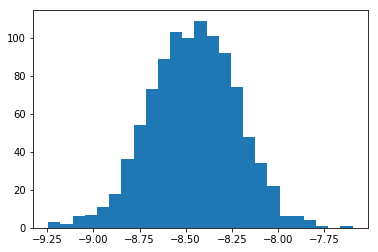

In [265]:
plt.hist(avg_objective_mixed, bins = 25)

(array([  1.,   1.,   1.,   1.,   2.,   7.,  10.,  27.,  38.,  46.,  76.,
         80.,  96., 109.,  99., 115.,  80.,  78.,  45.,  28.,  28.,  20.,
          5.,   5.,   2.]),
 array([4.54   , 4.57872, 4.61744, 4.65616, 4.69488, 4.7336 , 4.77232,
        4.81104, 4.84976, 4.88848, 4.9272 , 4.96592, 5.00464, 5.04336,
        5.08208, 5.1208 , 5.15952, 5.19824, 5.23696, 5.27568, 5.3144 ,
        5.35312, 5.39184, 5.43056, 5.46928, 5.508  ]),
 <a list of 25 Patch objects>)

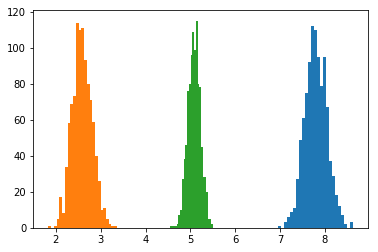

In [266]:
plt.hist(avg_wasted_mixed, bins = 25)
plt.hist(avg_give_up_mixed, bins = 25)
plt.hist(avg_wait_mixed, bins = 25)

In [306]:
def SlotSimulator_mixed_max(num_patients, sunshine):
    slots = []
    new_slots = []
    waiting = []  

    for i in range(9):
        slots.append(0)
        waiting.append(0)
        new_slots.append(0)
        
    # randomize the slot
    i = 0
    for i in range(5):
        slots[i] = numpy.random.binomial(2, sunshine_array2[sunshine][i])
    for i in range(5,9):
        slots[i] = numpy.random.binomial(1, sunshine_array2[sunshine][i])
    while sum(slots) < num_patients and sum(slots) < 14:
        index = random.randint(0,8)
        if slots[index] < 2 and index < 5:
            slots[index] += 1
        elif slots[index] < 1 and index >= 5 and index < 9:
            slots[index] += 1
    slots_used = 0
    slots_used_no_show = 0
    total_visit_slots = max(sum(slots), num_patients)
    old_slots = []
    # who will not show up??
    for i in range(7):
        tempon = numpy.random.binomial(slots[i], 1)
        new_slots[i] = tempon
        old_slots.append(tempon)
        if slots[i] > 0:
            slots_used += 1
        if new_slots[i] > 0:
            slots_used_no_show += 1
        
   
    slots_no_show = sum(new_slots)
    # simulate complete
    for i in range(len(new_slots)):
        if new_slots[i] >= 1 and waiting[i] == 0:
            if i < 8:
                waiting[i+1] = new_slots[i] - 1
            new_slots[i] = 1
        elif new_slots[i] >= 1 and waiting[i] > 0:
            if i < 8:
                waiting[i+1] = new_slots[i] + waiting[i] - 1
            new_slots[i] = 1
        elif new_slots[i] == 0 and waiting[i] > 0:
            new_slots[i] = 1
            if i < 8:
                waiting[i+1] = waiting[i] - 1
            for j in range(i-2, i+1):
                tempo = waiting[j] - 1
                waiting[j] = max(0, tempo)
                
        # after waiting one hour patients will reschedule
        if i >= 2 and i < 8 and waiting[i-2] > 0:
            temp = waiting[i+1] - waiting[i-2]
            waiting[i+1] = max(0, temp)
            for j in range(i-2,i):
                temp2 = waiting[j] - waiting[i-2]
                waiting[j] = max(0, temp2)
        
    slot_potential_wasted = slots_used - slots_used_no_show
    give_up = slots_no_show - sum(new_slots)
    wait_only_one_time = sum(new_slots) - slots_used_no_show
    loss_prevented = sum(new_slots) - slots_used_no_show

    return [slot_potential_wasted, give_up, wait_only_one_time, loss_prevented]   

In [307]:
objective_mixed_max = []
resources_wasted_mixed_max = []
available_slots_mixed_max = []
objective_func_mixed_max = [-1, -1.5, -0.25, -0.6, -0.15, 0.5]
# -1: no show (slot-wise), -0.4: waiting too long to reschedule, -0.2: waiting just for one slot, 0: no waiting
# -0.6: too packed (worst case), -0.15 : ok packed, 0: no packed, 0.5: slot created by letting patients wait


for iteration in range(1):
    day = 0
    temp_objective_mixed_max = []
    temp_resources_wasted_mixed_max = []
    temp_available_slots_mixed_max = []
    
    while day < intervals:
        patients_visit = 120
        
        therapists_patients = []
        patients_per_therapist = int(patients_visit / num_therapists)
        for i in range(num_therapists):
            therapists_patients.append(patients_per_therapist)
        i = 0
        while sum(therapists_patients) < patients_visit:
            therapists_patients[i] += 1
            i += 1
        
        slots_wasted = 0
        patients_give_up = 0
        patients_wait_one_time = 0
        slots_created = 0
        ys = []
        
        for therapist in range(len(therapists_patients)):
            visit_morning = int(therapists_patients[therapist] / 2)
            visit_afternoon = therapists_patients[therapist] - visit_morning 
           
            morning_result_therapist = SlotSimulator_mixed_max(visit_morning, 0)
            afternoon_result_therapist = SlotSimulator_mixed_max(visit_afternoon, 1)
            
            slots_wasted += morning_result_therapist[0] + afternoon_result_therapist[0]
            patients_give_up += morning_result_therapist[1] + afternoon_result_therapist[1]
            patients_wait_one_time += morning_result_therapist[2] + afternoon_result_therapist[2]
            ys.append(visit_morning + visit_afternoon - 14)
            
            slots_created += morning_result_therapist[3] + afternoon_result_therapist[3]
        
        ok_packed = 0
        too_packed = 0
        for y in range(len(ys)):
            if y > 0 and y <= 2:
                ok_packed += 1
            elif y > 2:
                too_packed += 1
            
        ok_packed = 0
        too_packed = 0
        for y in range(len(ys)):
            if y > 0 and y <= 2:
                ok_packed += 1
            elif y > 2:
                too_packed += 1
        
        result = [slots_wasted, patients_give_up, patients_wait_one_time, too_packed, ok_packed, slots_created]
        obj_result = 0
        for i in range(len(objective_func_over)):
            obj_result += objective_func_mixed[i] * result[i]
        
        temp_objective_mixed_max.append(obj_result) 
        temp_resources_wasted_mixed_max.append([slots_wasted, too_packed, ok_packed])
        temp_available_slots_mixed_max.append([patients_give_up, patients_wait_one_time])
        day = day + 1

    objective_mixed_max.append(temp_objective_mixed_max)
    resources_wasted_mixed_max.append(temp_resources_wasted_mixed_max)
    available_slots_mixed_max.append(temp_available_slots_mixed_max)
        

In [314]:
avg_objective_mixed_max = []
avg_objective_mixed_max.append(mean(objective_mixed_max[0]))
avg_give_up = [mean(available_slots_mixed_max[0][0])]
avg_slots_wasted

[1]

In [315]:
available_slots_mixed_max

[[[40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],
  [40, 0],

In [309]:
avg_avg_objective_mixed_max = mean(avg_objective_mixed_max)
avg_avg_objective_mixed_max

-60.9

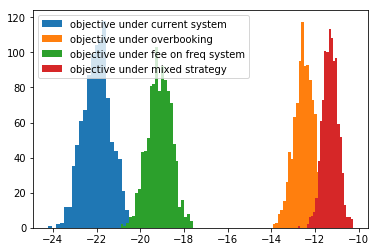

In [43]:
plt.hist(avg_objective_current, bins = 25, label = 'objective under current system')
plt.hist(avg_objective_over, bins = 25, label = 'objective under overbooking')
plt.hist(avg_objective_freq, bins = 25, label = 'objective under fee on freq system')
plt.hist(avg_objective_mixed, bins = 25, label = 'objective under mixed strategy')
plt.legend()

Text(0.5,1,'Resource wasted for each strategy')

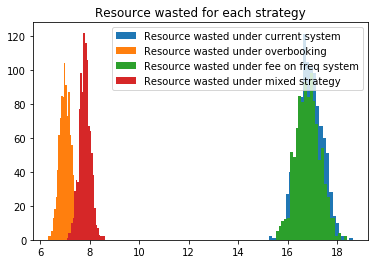

In [36]:
plt.hist(avg_no_show_current, bins = 25, label = 'Resource wasted under current system')
plt.hist(avg_wasted_over, bins = 25, label = 'Resource wasted under overbooking')
plt.hist(avg_no_show_freq, bins = 25, label = 'Resource wasted under fee on freq system')
plt.hist(avg_wasted_mixed, bins = 25, label = 'Resource wasted under mixed strategy')
plt.legend()
plt.title('Resource wasted for each strategy')

Text(0.5,1,'Patients who give up waiting for each strategy')

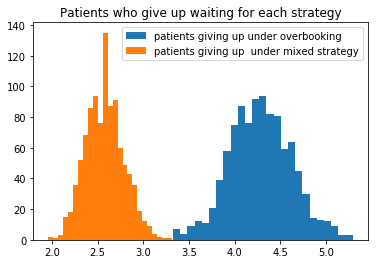

In [37]:
plt.hist(avg_give_up_over, bins = 25, label = 'patients giving up under overbooking')
plt.hist(avg_give_up_mixed, bins = 25, label = 'patients giving up  under mixed strategy')
plt.legend()
plt.title('Patients who give up waiting for each strategy')

Text(0.5,1,'Patients who give up waiting for each strategy')

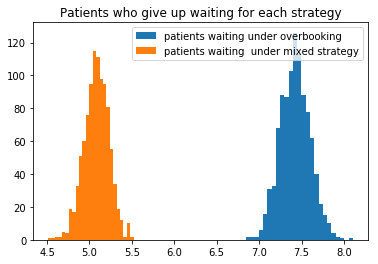

In [38]:
plt.hist(avg_wait_over, bins = 25, label = 'patients waiting under overbooking')
plt.hist(avg_wait_mixed, bins = 25, label = 'patients waiting  under mixed strategy')
plt.legend()
plt.title('Patients who are waiting for each strategy')

Text(0.5,1,'Patients not showing up for each strategy')

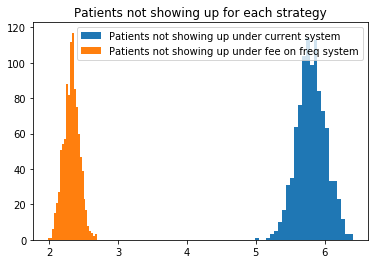

In [44]:
plt.hist(avg_not_showing_current, bins = 25, label = 'Patients not showing up under current system')
plt.hist(avg_not_showing_freq, bins = 25, label = 'Patients not showing up under fee on freq system')
plt.legend()
plt.title('Patients not showing up for each strategy')


Text(0.5,1,'Patients changing their mind for each strategy')

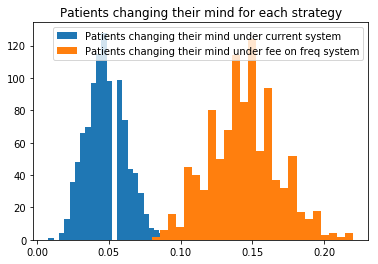

In [42]:
plt.hist(avg_changing_mind_current, bins = 25, label = 'Patients changing their mind under current system')
plt.hist(avg_changing_mind_freq, bins = 25, label = 'Patients changing their mind under fee on freq system')
plt.legend()
plt.title('Patients changing their mind for each strategy')